# MODELO K-MEANS

## Juan David Mora Daza

## Instalar las Librerías Necesarias

In [2]:
pip install numpy pandas matplotlib seaborn scikit-learn scipy


In [4]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install notebook


Note: you may need to restart the kernel to use updated packages.


## Probar la Configuración

In [60]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import os
os.environ["OMP_NUM_THREADS"] = "1"
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")

# Mostrar versión de las librerías clave
print("Numpy:", np.__version__)
print("Pandas:", pd.__version__)
print("Seaborn:", sns.__version__)


Numpy: 1.26.4
Pandas: 2.2.2
Seaborn: 0.13.2


Cargar el Dataset

In [63]:
# Importar las librerías necesarias
import pandas as pd

# Cargar el dataset
dataset_path = "Mall_Customers.csv"  # Reemplaza con la ubicación de tu archivo
data = pd.read_csv(dataset_path)

# Visualizar los primeros registros
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


## Entender los Datos

In [66]:
# Información general del dataset
print(data.info())

# Resumen estadístico
print(data.describe())

# Visualizar las columnas
print("Columnas:", data.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

## Preprocesar los Datos

In [69]:
# Verificar valores faltantes
print("Valores faltantes:\n", data.isnull().sum())

# Seleccionar las características relevantes
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]  # Ingreso anual y puntaje de gasto

# Escalar las características (opcional, pero recomendable)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Valores faltantes:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


## Encontrar el Número Óptimo de Clústeres

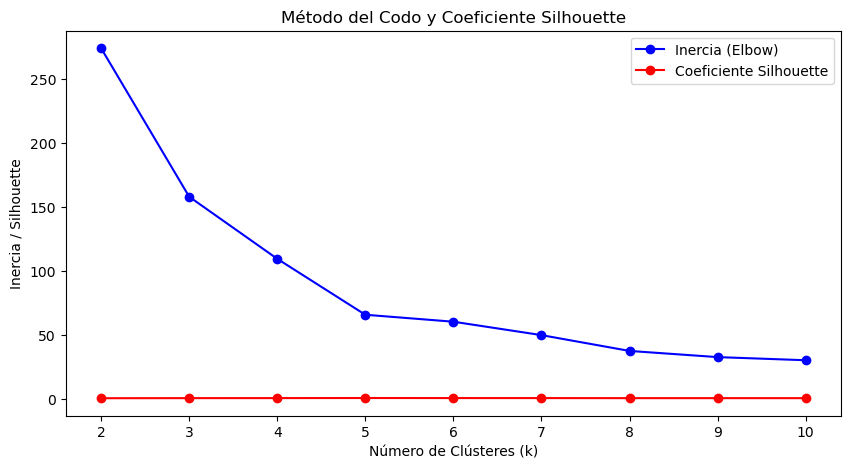

In [72]:
# Método del codo
inertia = []
silhouette_scores = []
K = range(2, 11)  # Probamos con clústeres de 2 a 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Visualizar el método del codo
plt.figure(figsize=(10, 5))
plt.plot(K, inertia, 'bo-', label='Inercia (Elbow)')
plt.plot(K, silhouette_scores, 'ro-', label='Coeficiente Silhouette')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia / Silhouette')
plt.legend()
plt.title('Método del Codo y Coeficiente Silhouette')
plt.show()


## Entrenar el Modelo K-means

In [75]:
# Entrenar el modelo K-means
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

# Etiquetas de los clústeres
labels = kmeans.labels_

# Agregar las etiquetas al DataFrame original
data['Cluster'] = labels
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


## Visualizar los Resultados

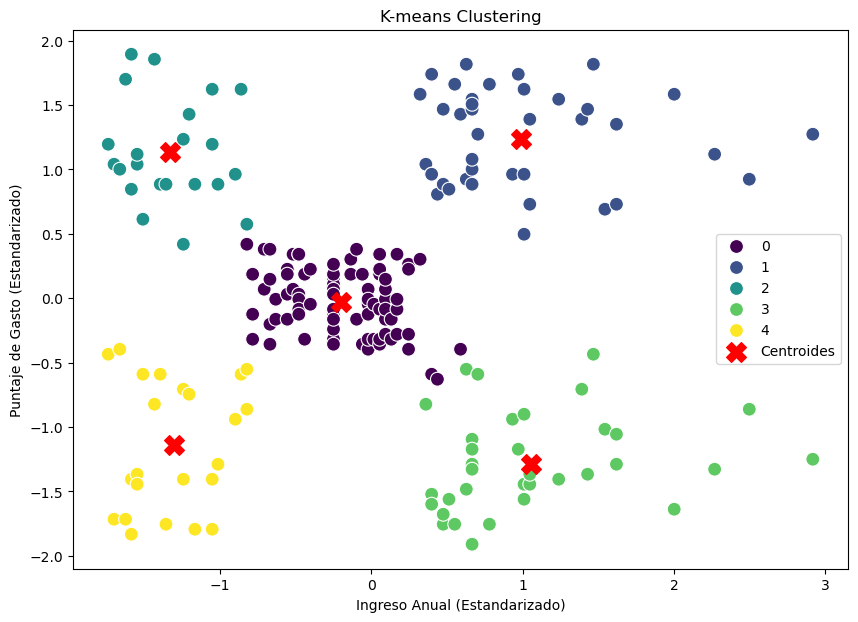

In [78]:
import seaborn as sns

# Gráfica de dispersión de los clústeres
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=X_scaled[:, 0],
    y=X_scaled[:, 1],
    hue=labels,
    palette='viridis',
    s=100
)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.xlabel('Ingreso Anual (Estandarizado)')
plt.ylabel('Puntaje de Gasto (Estandarizado)')
plt.title('K-means Clustering')
plt.legend()
plt.show()


## Evaluar el Modelo

In [81]:
from sklearn.metrics import silhouette_score

# Calcular el coeficiente de silhouette
silhouette = silhouette_score(X_scaled, labels)
print(f"Coeficiente de Silhouette: {silhouette:.2f}")


Coeficiente de Silhouette: 0.55


## Guardar los Resultados

In [84]:
# Guardar el DataFrame con los resultados
data.to_csv('Mall_Customers_with_Clusters.csv', index=False)
print("Archivo guardado con los resultados.")


Archivo guardado con los resultados.


## conclusion

### Interpretación General
Con k=5 como el número óptimo de clústeres:
Los datos se agrupan de manera significativa, permitiendo analizar segmentos específicos.
La inercia indica que la distancia promedio dentro de los clústeres es razonable para un modelo con 5 grupos.
Aunque el coeficiente de Silhouette no alcanza valores muy altos (>0.7), sigue siendo suficiente para justificar este nivel de segmentación.
    
### Conclusión Final
El análisis indica que el modelo K-means con k=5 es una opción adecuada para segmentar a los clientes según sus ingresos anuales y hábitos de gasto. Esto permite desarrollar estrategias dirigidas basadas en patrones específicos de comportamiento. Sin embargo:

Potencial mejora: Podría explorarse la inclusión de más variables (como la frecuencia de compra) para mejorar la cohesión de los clústeres.
Validación adicional: Complementar el análisis con otras métricas, como la varianza explicada o la evaluación manual de los clústeres, garantizaría resultados más robustos.